> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [30]:
def hist_plot_by(x, xlabel, ylabel):
     ''' A function to draw a histgram '''
     ax = plt.figure(figsize=(10, 10))
     ax = plt.subplot(1,1,1)
     ax.hist(x)
     ax.set_xlabel(xlabel)
     ax.set_ylabel(ylabel)
     plt.show()

<a id='intro'></a>
## Introduction

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.



>Movies MAX and MIN runtime minuets. <br>
is there a  relation between a movie runtime and it's revnue?
<br>
which actors has the maximum number of appearances in movies in 2014
<br>
which actor has the most number of Action movies

In [31]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

>-Check which data are relevant to answer our questions<br>
-checck for dupes


### General Properties

In [32]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("tmdb-movies.csv")
df.tail(15)
#df.hist(figsize=(10,8));
sum(df.duplicated())


1

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Removing irrelevant columns. remove rows with nan values. check for dubilcates and remove(if found) !)

>-Remove coloumns that aren't relevant to our analysis (id, imdb_id, popularity, homepage, keywords, overview, production_companies, vote_count, budget_adj, revenue_adj.)<br>
-Remove rows with Nan values.<br>
-remove dubes<br>
-replace 0 with nan<br>
-fix data types


In [33]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop_duplicates()
dropCO = ['id','imdb_id','popularity','homepage','keywords', 'overview', 'production_companies', 'vote_count','budget_adj','revenue_adj']
df=df.drop(dropCO,1)
df= df.replace(0,np.NAN)
df.dropna(how = 'any',inplace = True)
df = df.reset_index(drop=True)
df.tail()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_35880/3798019116.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop(dropCO,1)


,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year
3568,7500000.0,33736689.0,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,You are cordially invited to George and Martha...,131.0,Drama,6/21/66,7.5,1966
3569,3000000.0,13000000.0,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,It tears you apart with suspense!,128.0,Mystery|Thriller,7/13/66,6.3,1966
3570,4653000.0,6000000.0,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,It's the Big One with the Big Two,120.0,Action|Western,12/17/66,6.9,1966
3571,12000000.0,20000000.0,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,This is the heroic story of the men on the U.S...,182.0,Action|Adventure|Drama|War|Romance,12/20/66,7.0,1966
3572,5115000.0,12000000.0,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,A Fantastic and Spectacular Voyage... Through ...,100.0,Adventure|Science Fiction,8/24/66,6.7,1966


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Max and min runtime && relation between runtime and revenue)
>-use histogram to show the number of movie of a given runtime nd print max and min value<br>
-use skatter to show the relation between runtime and revenue in 10 millions

26.0
338.0
0    100.0
dtype: float64


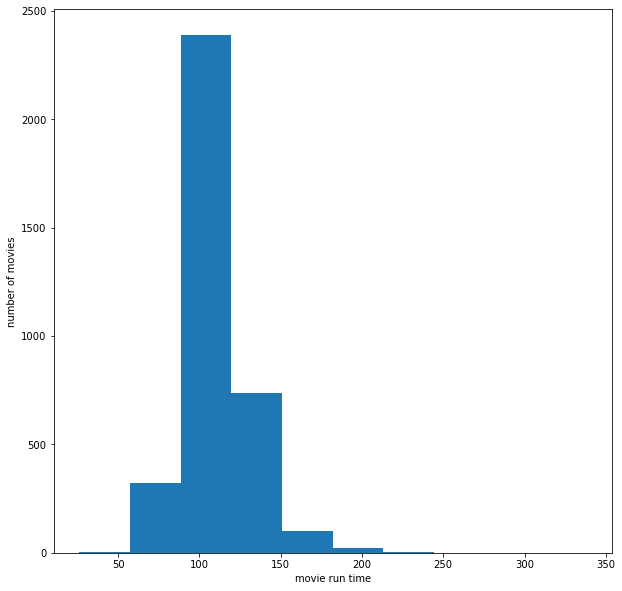

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3573 entries, 0 to 3572
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          3573 non-null   float64
 1   revenue         3573 non-null   float64
 2   original_title  3573 non-null   object 
 3   cast            3573 non-null   object 
 4   director        3573 non-null   object 
 5   tagline         3573 non-null   object 
 6   runtime         3573 non-null   float64
 7   genres          3573 non-null   object 
 8   release_date    3573 non-null   object 
 9   vote_average    3573 non-null   float64
 10  release_year    3573 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 307.2+ KB


In [34]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
print(df['runtime'].min())
print(df['runtime'].max())
print(df['runtime'].mode())
hist_plot_by(df["runtime"], "movie run time", "number of movies")
#df[['runtime', 'revenue']].plot(x="runtime", y="revenue", kind="scatter")
df.info()

>-We can notice that most of the films are between 90 minutes to 120 minutes.<br>
-we can also see that the run time of most movies is 100 minuet



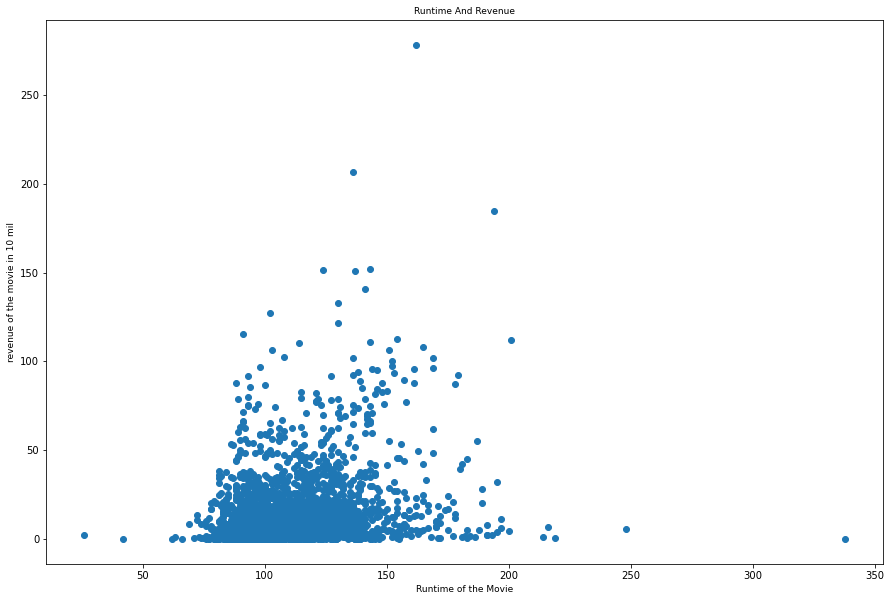

In [35]:
plt.figure(figsize=(15,10))
plt.xlabel('Runtime of the Movie', fontsize = 9)
plt.ylabel('revenue of the movie in 10 mil', fontsize=9)
plt.title('Runtime And Revenue', fontsize=9)
newrevenue=df["revenue"]/10000000
plt.scatter(df['runtime'],newrevenue)

the scatter shows that movies from 90 to 120 min are more likely to make more revenue.However, that's not the case here don't let the plot fool you most of the movies are in this range so most of big revenue movies are too. 

### Research Question 2  (average movie budget & relation between runtime and vote avarege)
-calculate average movie bugdget<br>
-use skatter to show the relation between runtime and vote average in 10 millions

In [36]:
df["budget"].mean()

38712308.04813882

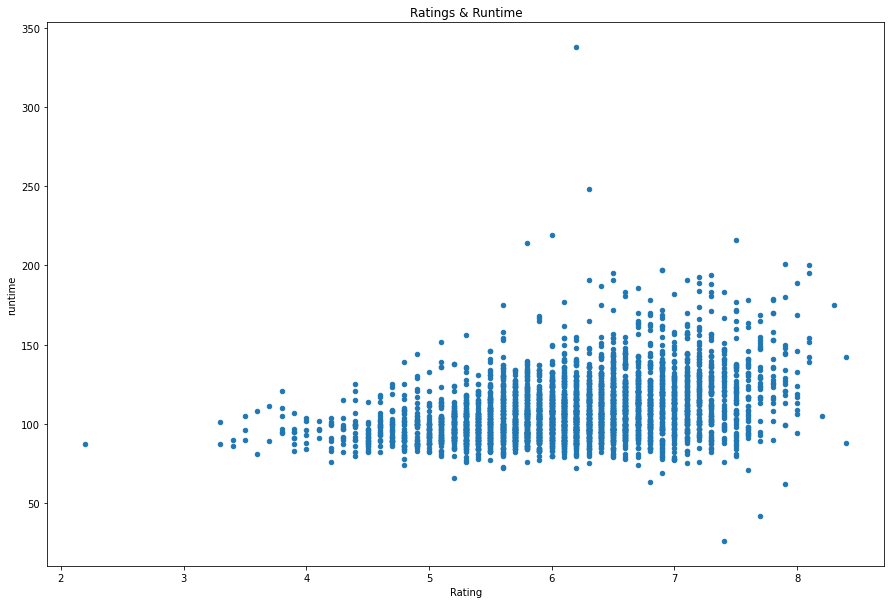

In [37]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.plot(x='vote_average', y='runtime', kind='scatter', figsize=(15,10))
plt.title('Ratings & Runtime')
plt.xlabel('Rating')
plt.ylabel('runtime');

From this scatter plot, we can draw several conclusions:

>-short films are more likely to have a mid-to-high rating.
-The ratings of films with a runtime of around 100 minutes can't be predicted, as they can vary from low to high.
-movies with a runtime above or below 100 minues tend to have mid-to-high ratings.
-movies with long runtime consistently get higher-than-average ratings.

## Conclusions

>the conclusion is, that if we want to create movies we shold consider<br>
The average budget of the movies can be arround 38,712,308 Dollars<br>
The average runtime of the movies can be arround 100 Minutes<br>
longer movies are more likely to get higer average votes<br>
runtime doesnt directly impact revenue<br>
short movies (less than 10 minutes) are likely to have a mid-to-highrating,<br>
The ratings of movies with a runtime of around 100 minutes can't be predicted,<br>
min & max run time : 26 & 338<br>



>The limitations associated with the conclusions are:<br>
The conclusion doesn't fully proof that with the above requirement in mind the movie will be a big hit but it can be.<br>
however,  Some limitations the dataset contains are NAN and zero values in some features. These zero and NAN values hinders the< analysis process and have to be removed the rows that correspond to these zero and null values, Moreover we are not even sure if the data provided to us is completel corect and up-to-date.<br>
the budget and revenue coloumns don't have a unit of currencey<br>
This conclusion is not error free.<br>
